# Analisis de sentimiento

## Preparacion entorno virtual

conda create --name Sentiemnt_Analysis python = 3.10

condata activate Sentiemnt_Analysis

conda install ipykernel

python -m ipykernel install --user --name Sentiemnt_Analysis

## Paquetes

1) TextBlob: conda install -c conda-forge textblob, python -m textblob.download_corpora

2) Pandas: conda install pandas 

3) numpy:conda install numpy

4) VADER: pip install nltk

5) spaCy: conda install -c conda-forge spacy, python -m spacy download es_core_news_sm, python -m download xx_ent_wiki_sm

6) Hugging Face: conda install -c conda-forge transformers pytorch

7) SQLAlchemy: pip install SQLAlchemy

8) Psycog2: pip install psycopg2-binary

## Librerias

In [2]:
import pandas as pd
import numpy as np
import sqlalchemy
import psycopg2

from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

import spacy
from transformers import pipeline

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\d3smo\anaconda3\envs\Progra1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Carga de datos y separación de categorias agrupadas por sentimiento segun el documento

In [5]:
comentarios = pd.read_csv('comentarios.csv', delimiter = ';', header = 0, encoding = 'ANSI')
comentarios

,texto,sentimiento,categoria
0,Excelente atención y muy buena disposición en ...,1,1
1,Los productos son de alta calidad y siempre ll...,1,1
2,Me encanta el diseño y la funcionalidad de la ...,1,1
3,"Estoy muy contento con el producto, superó mis...",1,1
4,"El servicio postventa fue excelente, resolvier...",1,1
...,...,...,...
198,El documental que vi sobre la historia del art...,0,2
199,"La visita al museo fue frustrante, muchas exhi...",0,2
200,Los talleres extracurriculares han fomentado e...,1,3
201,La integración de tecnología en el aula ha fac...,1,3


In [6]:
def verif(DF) -> dict:
    d = {}
    f, c = DF.shape
    for i in range(c):
        col = list(DF.iloc[:, i])
        for e in range(len(col)):
            tipo = type(col[e])
            t = type(col[e -1])
            if t == tipo:
                d.update({DF.columns.values[i] : tipo}) 
            else:
                d.update({DF.columns.values[i] : "datos incosistentes"}) 
                break
    return d, f, c

In [7]:
com_d, com_f, com_c = verif(comentarios)

com_d

{'texto': str, 'sentimiento': int, 'categoria': int}

In [8]:
pos_opn = []
neg_opn = []
pos_clt = [] 
neg_clt = []
pos_edc = []
neg_edc =[]

for i in range(com_f):
    l = list(comentarios.iloc[i,:])
    match l[2]:
        case 1:
            pos_opn.append(l.pop(0)) if l[1] == 1 else neg_opn.append(l.pop(0))
        case 2:
            pos_clt.append(l.pop(0)) if l[1] == 1 else neg_clt.append(l.pop(0))
        case 3:
            pos_edc.append(l.pop(0)) if l[1] == 1 else neg_edc.append(l.pop(0))
            



In [9]:
len(pos_opn), len(neg_opn), len(pos_clt), len(neg_clt), len(pos_edc), len(neg_edc)

(35, 35, 35, 35, 33, 30)

## Prueba de comprención de las librerias

### TextBlob

Data para el clasificador

In [10]:
coment = []

for i in range(com_f):
    row = list(comentarios.iloc[i,:])
    match row[1]:
        case 1:
            coment.append((comentarios.iloc[i,0],'pos'))
        case 0:
            coment.append((comentarios .iloc[i, 0], 'neg'))

coment

[('Excelente atención y muy buena disposición en el servicio. Recomendado.',
  'pos'),
 ('Los productos son de alta calidad y siempre llegan a tiempo. Muy satisfecho.',
  'pos'),
 ('Me encanta el diseño y la funcionalidad de la aplicación. Es intuitiva y fácil de usar.',
  'pos'),
 ('Estoy muy contento con el producto, superó mis expectativas en todos los sentidos.',
  'pos'),
 ('El servicio postventa fue excelente, resolvieron mi problema de inmediato.',
  'pos'),
 ('Muy mala experiencia con la compra, el producto llegó en mal estado.',
  'neg'),
 ('El servicio al cliente fue poco profesional y no resolvieron mis problemas.',
  'neg'),
 ('Me siento decepcionado, la calidad no es como la prometen en la publicidad.',
  'neg'),
 ('Tardaron demasiado en responder y no solucionaron mi inconveniente.',
  'neg'),
 ('No recomendaría este servicio, tuve problemas desde el principio.', 'neg'),
 ('La exposición de arte fue increíble, muy bien organizada y con grandes obras.',
  'pos'),
 ('El eve

In [11]:
train = coment[0:142]
test = coment[143:202]

In [12]:
test

[('La conferencia educativa a la que asistí fue inspiradora, los ponentes eran expertos en su área y brindaron conocimientos muy valiosos. ',
  'pos'),
 ('La escuela ha realizado mejoras en sus instalaciones y se nota que los estudiantes están más cómodos y enfocados en sus estudios. ',
  'pos'),
 ('El material educativo está desactualizado y no refleja los avances recientes en la materia, los estudiantes no están aprendiendo lo necesario. ',
  'neg'),
 ('La plataforma de aprendizaje en línea es confusa y difícil de usar, paso más tiempo tratando de entenderla que aprendiendo realmente. ',
  'neg'),
 ('Los recursos para la clase son limitados y muchas veces no están disponibles cuando los necesitamos, lo que afecta el proceso de aprendizaje. ',
  'neg'),
 ('El nivel de los profesores en algunos cursos deja mucho que desear, no están preparados para enseñar y eso se refleja en el desempeño de los alumnos. ',
  'neg'),
 ('Las condiciones de la escuela son bastante deficientes, hay falta 

Entrenamiento

In [13]:
cl = NaiveBayesClassifier(train)
cl

<NaiveBayesClassifier trained on 142 instances>

In [14]:
v =train[0][0]
print(v)
cl.classify(v)

Excelente atención y muy buena disposición en el servicio. Recomendado.


'pos'

In [15]:
t =test[0][0]
print(t)
cl.classify(t)

La conferencia educativa a la que asistí fue inspiradora, los ponentes eran expertos en su área y brindaron conocimientos muy valiosos. 


'pos'

In [16]:
cl.accuracy(test)

0.9491525423728814

In [17]:
def pol_cat(texto = []) -> dict:
    d = {
        'texto':[],
        'polaridad':[]
    }
    for oracion in texto:
        text = TextBlob(oracion)
        polaridad = text.sentiment.polarity
        d['texto'].append(oracion)
        d['polaridad'].append(polaridad)
    return d
        

In [18]:
opn = pos_opn + neg_opn

In [19]:
len(opn)

70

In [20]:
opinion = pd.DataFrame(pol_cat(opn))
opinion

,texto,polaridad
0,Excelente atención y muy buena disposición en ...,0.0
1,Los productos son de alta calidad y siempre ll...,0.0
2,Me encanta el diseño y la funcionalidad de la ...,0.0
3,"Estoy muy contento con el producto, superó mis...",0.0
4,"El servicio postventa fue excelente, resolvier...",0.0
...,...,...
65,"La atención en la tienda fue muy mala, el pers...",0.0
66,"El hotel no cumplió con lo prometido, la habit...",0.0
67,"La experiencia en el evento fue decepcionante,...",0.0
68,"La música en el bar era demasiado alta, no pod...",0.0


In [21]:
tt = TextBlob("I hate this, it is terrible")
print(tt.sentiment)

Sentiment(polarity=-0.9, subjectivity=0.95)


### VADER

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\d3smo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
analyzer = SentimentIntensityAnalyzer()

In [24]:
texto = opn[0]
scores = analyzer.polarity_scores(texto)
scores


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [25]:
texto = "I LOVE this project! It's so cool! :)"
scores = analyzer.polarity_scores(texto)
scores


{'neg': 0.0, 'neu': 0.253, 'pos': 0.747, 'compound': 0.9151}

TextBlob y VADER solo pueden trabajar con frases en ingles, en caso de utilizar frases en español hay que traducirlas antes de procesarlas

### Graficos

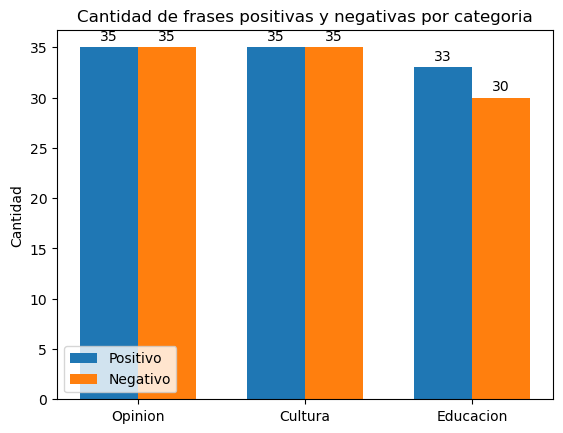

In [26]:
etiqueta = ['Opinion', 'Cultura', 'Educacion']
positivo = [len(pos_opn), len(pos_clt), len(pos_edc)]
negativo = [len(neg_opn), len(neg_clt), len(neg_edc)]

x = np.arange(len(etiqueta))  # ubicacion de las etiquetas
width = 0.35  # ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positivo, width, label='Positivo')
rects2 = ax.bar(x + width/2, negativo, width, label='Negativo')

ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de frases positivas y negativas por categoria')
ax.set_xticks(x, etiqueta)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()

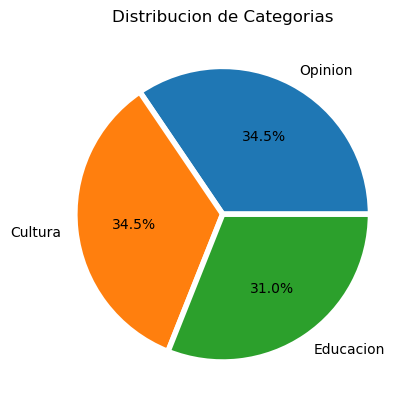

In [27]:
clt = pos_clt + neg_clt

edc = pos_edc + neg_edc

etiqueta = ['Opinion', 'Cultura', 'Educacion']
slices = [len(opn), len(clt), len(edc)]


plt.pie(slices, labels=etiqueta, autopct = '%1.1f%%', 
       wedgeprops={"linewidth": 4, "edgecolor": "white"})  

plt.title('Distribucion de Categorias')
plt.show()

### SpaCy para wordcloud

Uso de spacy para la creacin de Wordclouds

In [28]:
def WdCLoud (l =[]):
    limpio = ""
    nlp = spacy.load("es_core_news_sm")
    wc = WordCloud(
    background_color = 'white',
    height = 1080,
    width = 1440
)
    for txt in l:
        doc = nlp(txt)
        p_l = [token.text for token in doc if not token.is_stop and not token.is_punct]
        for p in p_l:
            limpio += f"{p} "

    wrcl = wc.generate(limpio)
    
    return wrcl
        

Text(0.5, 1.0, 'Wordcloud de Opiniones')

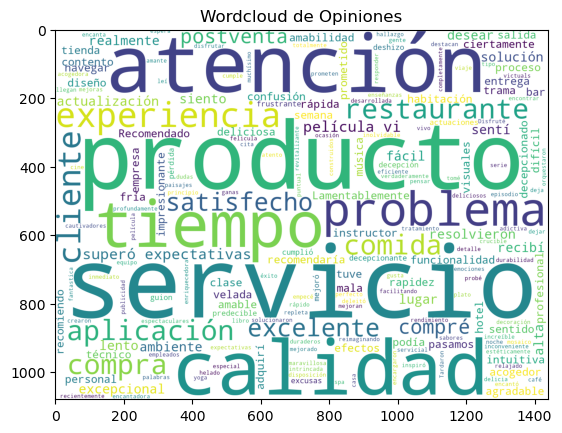

In [29]:
plt.imshow(WdCLoud(opn))
plt.title("Wordcloud de Opiniones")

Text(0.5, 1.0, 'Wordcloud de Opiniones Positivas')

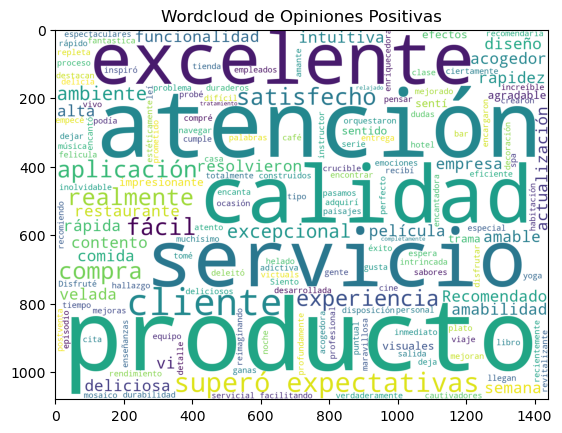

In [30]:
plt.imshow(WdCLoud(pos_opn))
plt.title("Wordcloud de Opiniones Positivas")

Text(0.5, 1.0, 'Wordcloud de Opiniones Negativas')

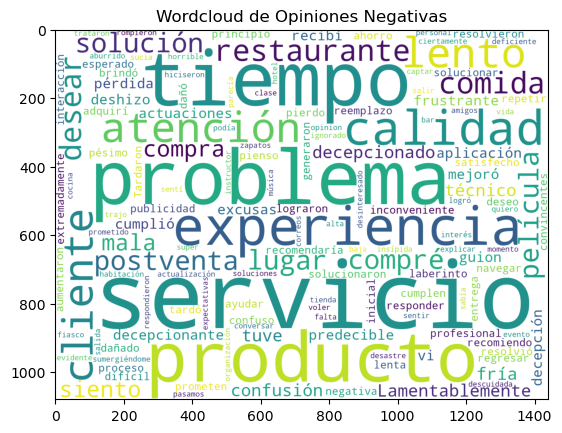

In [31]:
plt.imshow(WdCLoud(neg_opn))
plt.title("Wordcloud de Opiniones Negativas")

Text(0.5, 1.0, 'Wordcloud de Cultura')

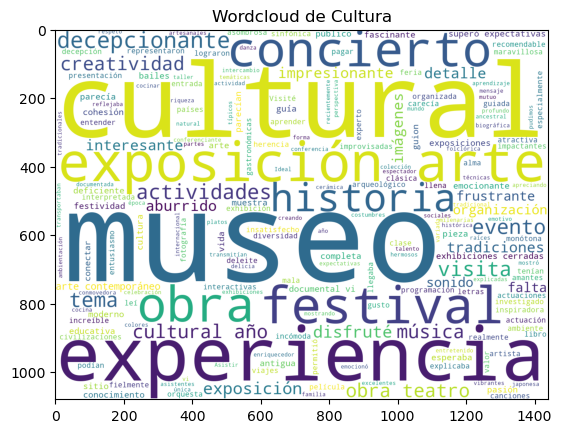

In [32]:
plt.imshow(WdCLoud(pos_clt+neg_clt))
plt.title("Wordcloud de Cultura")

Text(0.5, 1.0, 'Wordcloud Positivo de Cultura')

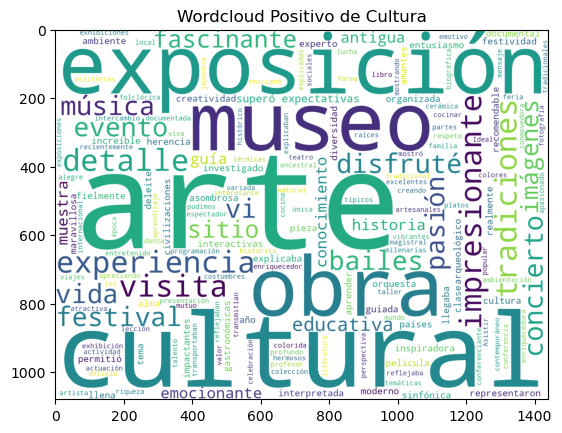

In [33]:
plt.imshow(WdCLoud(pos_clt))
plt.title("Wordcloud Positivo de Cultura")

Text(0.5, 1.0, 'Wordcloud Negativo de Cultura')

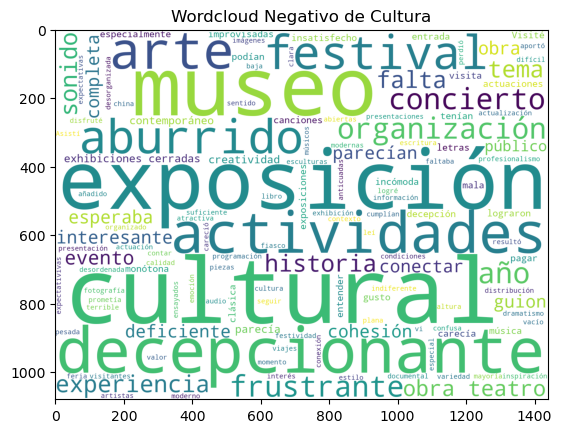

In [34]:
plt.imshow(WdCLoud(neg_clt))
plt.title("Wordcloud Negativo de Cultura")

Text(0.5, 1.0, 'Wordcloud de educación')

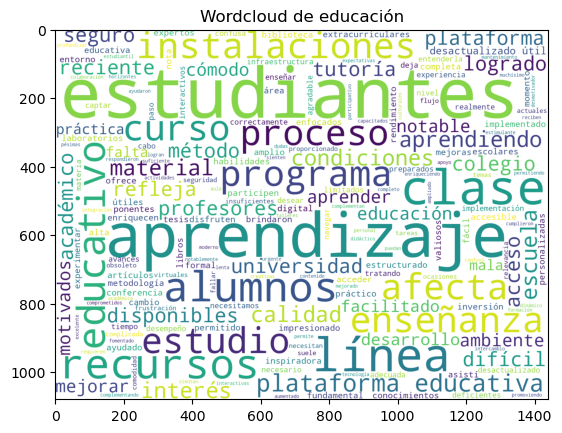

In [35]:
plt.imshow(WdCLoud(pos_edc+neg_edc))
plt.title("Wordcloud de educación")

Text(0.5, 1.0, 'Wordcloud positivo de educación')

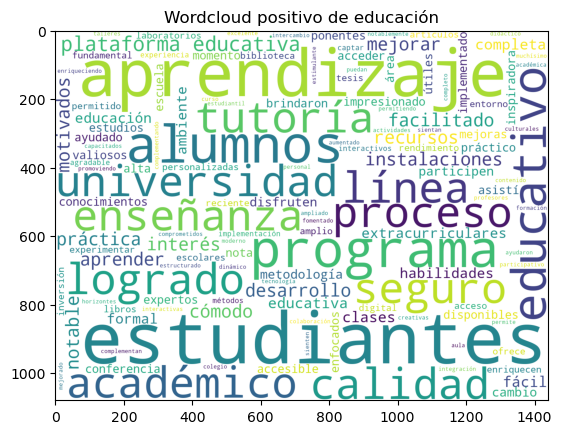

In [36]:
plt.imshow(WdCLoud(pos_edc))
plt.title("Wordcloud positivo de educación")

Text(0.5, 1.0, 'Wordcloud Negativo de educación')

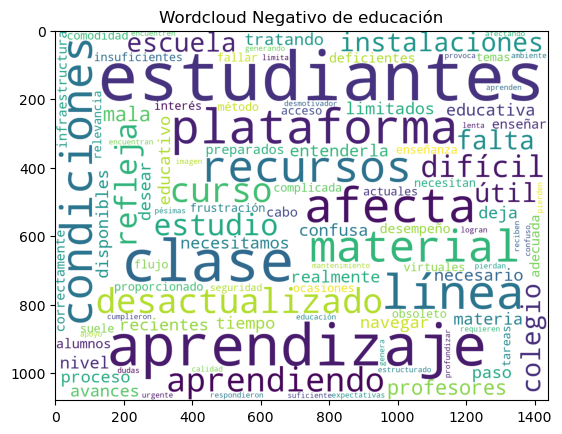

In [37]:
plt.imshow(WdCLoud(neg_edc))
plt.title("Wordcloud Negativo de educación")

### Spacy+Transformers

In [38]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1" # Silenciar aviso


nlp = spacy.blank("xx") # "xx" para multi-idioma


MODEL_NAME = "finiteautomata/beto-sentiment-analysis"  # Modelo de Hugging Face
sentiment_pipe = pipeline("sentiment-analysis", model=MODEL_NAME, tokenizer=MODEL_NAME) # Configurar el pipeline de Hugging Face

Loading weights: 100%|███████████████████████| 201/201 [00:00<00:00, 726.09it/s, Materializing param=classifier.weight]
BertForSequenceClassification LOAD REPORT from: finiteautomata/beto-sentiment-analysis
Key                          | Status     |  | 
-----------------------------+------------+--+-
bert.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [39]:
w = sentiment_pipe("La comida es excelente 😊, el mesero fue grosero, pero todo normal")
w

[{'label': 'NEU', 'score': 0.9778543710708618}]

In [41]:
# Crteaci[on de un componente personalizado para SpaCy
@spacy.Language.component("tag_sentiment")
def tag_sentiment(doc):
    # El modelo tiene un límite de tokens, el try-except maneja los errores
    try:
        res = sentiment_pipe(doc.text[:512])[0] #prevencion por el limite de memoria del transformer
        
        # Mapeo de las etiquetas del nuevo modelo
        mapping = {"NEG": "😡 Negativo", "NEU": "😐 Neutral", "POS": "😊 Positivo"}
        
        # Se guarda el resultado en extensiones de SpaCy para acceder despues
        doc.user_data["sentiment"] = mapping.get(res["label"], res["label"])
        doc.user_data["sentiment_score"] = round(res["score"], 4)
    except Exception as e:
        # En caso de error se pasa la información
        doc.user_data["sentiment"] = f"Error: {str(e)}"
        doc.user_data["sentiment_score"] = 0.0
    return doc

# Se añade la nueva componente al pipeline de SpaCy
nlp.add_pipe("tag_sentiment", last=True)

<function __main__.tag_sentiment(doc)>

In [42]:
def sent_df(data):
    analisis = {
        'texto':[],
        'sentimiento':[],
        'confianza':[]
    }
    for doc in nlp.pipe(data):
        analisis['texto'].append(doc.text)
        analisis['sentimiento'].append(doc.user_data['sentiment'])
        analisis['confianza'].append(doc.user_data['sentiment_score'])

    df = pd.DataFrame(analisis)
    return df        

In [43]:
s_df= sent_df(comentarios.iloc[ : ,0])
s_df['categoria'] = comentarios['categoria']

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [44]:
s_df

,texto,sentimiento,confianza,categoria
0,Excelente atención y muy buena disposición en ...,😊 Positivo,0.9987,1
1,Los productos son de alta calidad y siempre ll...,😊 Positivo,0.9987,1
2,Me encanta el diseño y la funcionalidad de la ...,😊 Positivo,0.9987,1
3,"Estoy muy contento con el producto, superó mis...",😊 Positivo,0.9986,1
4,"El servicio postventa fue excelente, resolvier...",😊 Positivo,0.9984,1
...,...,...,...,...
198,El documental que vi sobre la historia del art...,😡 Negativo,0.9985,2
199,"La visita al museo fue frustrante, muchas exhi...",😡 Negativo,0.9993,2
200,Los talleres extracurriculares han fomentado e...,😊 Positivo,0.9863,3
201,La integración de tecnología en el aula ha fac...,😊 Positivo,0.9981,3


In [45]:
def sent_cat_match(df, col_txt:str, col_sentimiento:str, sentimiento , col_categoria: str, categoria = None) -> dict:
    f, c = df.shape
    d = {
        'texto':[],
        'sentimiento':[],
        'categoria':[]
    }
    for col in range(f):
        row = df.iloc[col, : ]
        snt = row.loc[col_sentimiento]
        cat = row.loc[col_categoria]
        if snt == sentimiento and (cat == categoria or categoria == None):
            d['texto'].append(row.loc[col_txt])
            d['sentimiento'].append(row.loc[col_sentimiento])
            d['categoria'].append(row.loc[col_categoria]) if categoria != None else d['categoria'].append(" ")
                
    if categoria == None:
        del d['categoria']
        q = pd.DataFrame(d)
        return q
    else:
        q = pd.DataFrame(d)
        return q
    

In [46]:
match = sent_cat_match(s_df, col_txt= 'texto', col_sentimiento= 'sentimiento', sentimiento = '😐 Neutral', col_categoria = 'categoria', categoria = 3)

In [47]:
match

,texto,sentimiento,categoria
0,Los profesores no respondieron mis dudas.,😐 Neutral,3


## Estructura del flujo de datos

In [48]:
class Flujo:
    def __init__(self, col_txt, col_sentimiento, sentimiento, col_categoria, categoria):
        self.col_txt = col_txt
        self.col_sentimiento = col_sentimiento
        self.sentimiento = sentimiento
        self.col_categoria = col_categoria
        self.categoria = categoria
        self.parametros = (col_txt, col_sentimiento, sentimiento, col_categoria, categoria)


    # Flujo del analisis de sentimiento
    def sent_analisis_df(self, df, nlp):
        analisis = {
            'texto':[],
            'sentimiento':[],
            'confianza':[]
        }
        try:
            data = self.sent_cat_match(df, nlp).iloc[ :, 0]
            cat = self.sent_cat_match(df, nlp).iloc[ :, 2]
            analisis['categoria'] = cat
            data = self.sent_cat_match(df, nlp).iloc[ :, 0]
            for doc in nlp.pipe(data):
                analisis['texto'].append(doc.text)
                analisis['sentimiento'].append(doc.user_data['sentiment'])
                analisis['confianza'].append(doc.user_data['sentiment_score'])

        except Exception as e:
            data = self.sent_cat_match(df, nlp).iloc[ :, 0]
            for doc in nlp.pipe(data):
                analisis['texto'].append(doc.text)
                analisis['sentimiento'].append(doc.user_data['sentiment'])
                analisis['confianza'].append(doc.user_data['sentiment_score'])

        

        df = pd.DataFrame(analisis)
        
        return df


    # Para la creacion de wordclouds
    def WdCd (self, l: list, title: str) -> None:
        wc = WordCloud(
        background_color = 'white',
        height = 1080,
        width = 1440
        )
        clean = self.sw(l)
        wrcl = wc.generate(clean)
        
        plt.imshow(wrcl)
        plt.title(title)



    def sw(self, l:list):
        limpio = ""
        nlp = spacy.load("es_core_news_sm")
        for txt in l:
            doc = nlp(txt)
            p_l = [token.text for token in doc if not token.is_stop and not token.is_punct]
            for p in p_l:
                limpio += f"{p} "

        return limpio




        

    # Para filtrar por categoria y/o sentimiento
    def sent_cat_match(self, df, nlp):
        f, c = df.shape
        d = {
            'texto':[],
            'sentimiento':[],
            'categoria':[]
        }
        for col in range(f):
            row = df.iloc[col, : ]
            snt = row.loc[self.col_sentimiento]
            cat = row.loc[self.col_categoria]
            if (snt == self.sentimiento or self.sentimiento == " ") and (cat == self.categoria or self.categoria == " "):
                d['texto'].append(row.loc[self.col_txt])
                d['sentimiento'].append(row.loc[self.col_sentimiento]) 
                d['categoria'].append(row.loc[self.col_categoria]) 

        q = pd.DataFrame(d)
        return q


    def cont(self, df):
        dic = {}
        sen = df.iloc[:, 1]
        for i in sen:
            dic[i]=1 if i not in dic else dic[i] + 1
        return dic

In [49]:
textos = comentarios

In [50]:
S_A = Flujo(col_txt= 'texto', col_sentimiento= 'sentimiento', sentimiento = " ", col_categoria = 'categoria', categoria = " ")

In [51]:
t_p = S_A.sent_analisis_df(df = textos, nlp = nlp)
t_p

,texto,sentimiento,confianza,categoria
0,Excelente atención y muy buena disposición en ...,😊 Positivo,0.9987,1
1,Los productos son de alta calidad y siempre ll...,😊 Positivo,0.9987,1
2,Me encanta el diseño y la funcionalidad de la ...,😊 Positivo,0.9987,1
3,"Estoy muy contento con el producto, superó mis...",😊 Positivo,0.9986,1
4,"El servicio postventa fue excelente, resolvier...",😊 Positivo,0.9984,1
...,...,...,...,...
198,El documental que vi sobre la historia del art...,😡 Negativo,0.9985,2
199,"La visita al museo fue frustrante, muchas exhi...",😡 Negativo,0.9993,2
200,Los talleres extracurriculares han fomentado e...,😊 Positivo,0.9863,3
201,La integración de tecnología en el aula ha fac...,😊 Positivo,0.9981,3


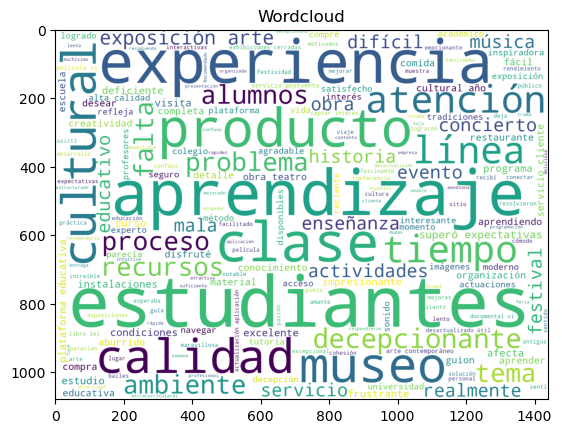

In [52]:
S_A.WdCd(l = t_p['texto'], title = 'Wordcloud')

In [53]:
cont_sent =S_A.cont(t_p)
cont_sent

{'😊 Positivo': 102, '😡 Negativo': 99, '😐 Neutral': 2}

In [54]:
cont_sent

{'😊 Positivo': 102, '😡 Negativo': 99, '😐 Neutral': 2}

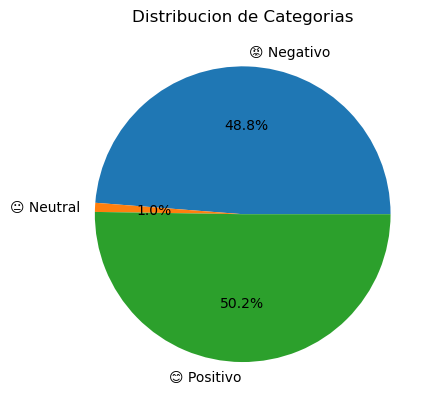

In [55]:


etiquetas = ["😡 Negativo", "😐 Neutral", "😊 Positivo"]

slices = [cont_sent["😡 Negativo"], cont_sent["😐 Neutral"], cont_sent["😊 Positivo"]]


plt.pie(slices, labels=etiquetas, autopct = '%1.1f%%', 
       wedgeprops={"linewidth": 0, "edgecolor": "white"})  

plt.title('Distribucion de Categorias')
plt.show()

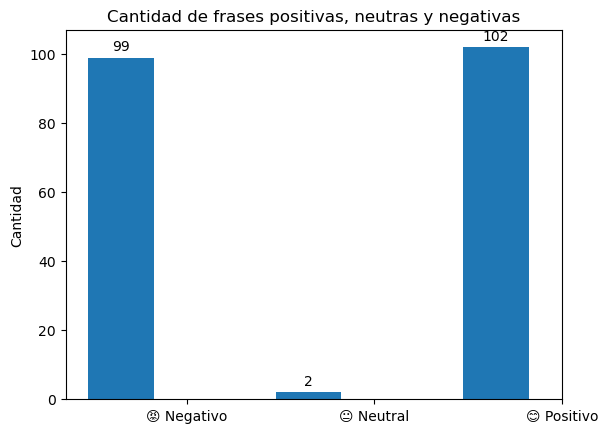

In [58]:
etiquetas = ["😡 Negativo", "😐 Neutral", "😊 Positivo"]

slices = [cont_sent["😡 Negativo"], cont_sent["😐 Neutral"], cont_sent["😊 Positivo"]]


x = np.arange(len(etiqueta))  # ubicacion de las etiquetas
width = 0.35  # ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, slices, width)

ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de frases positivas, neutras y negativas')
ax.set_xticks(x, etiquetas)

ax.bar_label(rects1, padding=3)
plt.show()

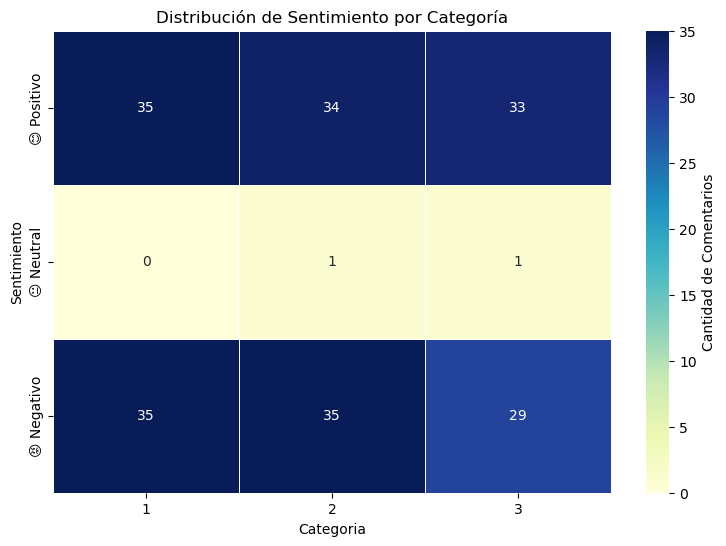

In [59]:
matriz = pd.crosstab(t_p['sentimiento'], t_p['categoria'])


f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matriz, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu", cbar_kws={'label': 'Cantidad de Comentarios'})

plt.title('Distribución de Sentimiento por Categoría')
plt.xlabel('Categoria')
plt.ylabel('Sentimiento')
plt.show()